In [2]:
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
# gdf = gpd.read_file(r"C:\Users\Myles.McManus\Documents\Working\temp\100yrEllipsePoints.shp")
gdf = gpd.read_file(r"C:\Users\Myles.McManus\Documents\Working\temp\100yrEllipsePoints_projected.shp")
gdf.head()



,i,PRECIP,geometry
0,0,53.756687,POINT (-10597401.790 3448413.006)
1,1,53.756687,POINT (-10592161.467 3449289.050)
2,2,53.756687,POINT (-10592213.002 3449464.674)
3,3,53.756687,POINT (-10592303.862 3449630.690)
4,4,53.756687,POINT (-10592433.400 3449785.973)


In [3]:
gdf.crs
# gdf.to_crs(epsg=4326)

# boundary = boundary.to_crs(epsg=3395)

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

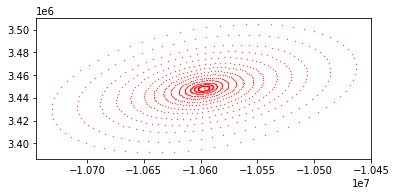

In [5]:
boundary = gpd.read_file(r"C:\Users\Myles.McManus\Documents\Working\GLO\GIS\_Municipalities\cb_2018_us_state_500k\cb_2018_us_state_500k.shp")
boundary.to_crs(epsg=4326)
# boundary = gpd.read_file(r"C:\Users\Myles.McManus\Documents\Working\temp\Dickinson Bayou.shp")
# boundary.to_crs(epsg=4326)
# fig, ax = plt.plot(figsize=(12, 10))
# boundary.plot(ax=ax, color='gray')
# gdf.plot(ax=ax, markersize=3.5, color='black')
# ax.axis('off')
# plt.axis('equal')
# plt.show()
# base = boundary.plot(color='white', edgecolor='black')

# base.plot(ax=gdf, marker='o', color='red', markersize=0.1)
gdf.plot(marker='o', color='red', markersize=0.1)

In [6]:
gdf

,i,PRECIP,geometry
0,0,53.756687,POINT (-10597401.790 3448413.006)
1,1,53.756687,POINT (-10592161.467 3449289.050)
2,2,53.756687,POINT (-10592213.002 3449464.674)
3,3,53.756687,POINT (-10592303.862 3449630.690)
4,4,53.756687,POINT (-10592433.400 3449785.973)
...,...,...,...
1004,1004,5.850607,POINT (-10472449.825 3446185.546)
1005,1005,5.850607,POINT (-10468683.857 3451079.828)
1006,1006,5.850607,POINT (-10465895.065 3455957.787)
1007,1007,5.850607,POINT (-10464105.938 3460785.792)


<AxesSubplot:>

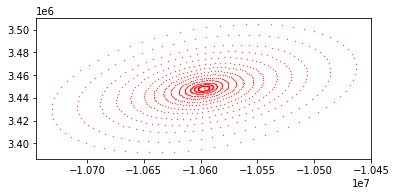

In [17]:
cvh = gdf.convex_hull
cvh.plot(marker='o', color='red', markersize=0.1)


<AxesSubplot:>

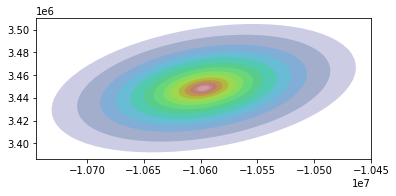

In [87]:
cvh = gdf.dissolve("PRECIP").convex_hull
cvh.to_crs(epsg=4326)
cvh.plot(alpha=.2, cmap="gist_ncar")

In [88]:
cvh.to_file("out.geojson", driver='GeoJSON')

<AxesSubplot:>

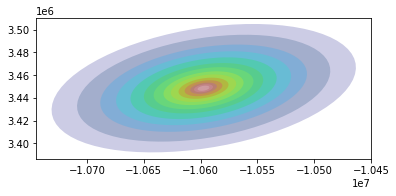

In [84]:
from shapely.geometry import Point, Polygon

df = gdf.groupby('PRECIP')['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()

# Declare the result as a new a GeoDataFrame
# df = gdf.GeoDataFrame(df, geometry = 'geometry')
# df.convex_hull
df.plot(alpha=0.2, cmap='gist_ncar')
# df

In [41]:
df

,PRECIP,geometry
0,5.850607,"POLYGON ((-10463578.084 3470141.467, -10464845..."
1,10.013613,"POLYGON ((-10486085.438 3466582.240, -10487146..."
2,14.116183,"POLYGON ((-10506536.045 3463315.429, -10507406..."
3,17.947426,"POLYGON ((-10520492.082 3461067.500, -10521231..."
4,22.074747,"POLYGON ((-10533171.967 3459012.213, -10533792..."
5,27.288162,"POLYGON ((-10544966.341 3457089.074, -10545474..."
6,33.046989,"POLYGON ((-10553536.019 3455685.858, -10553961..."
7,41.758446,"POLYGON ((-10562234.896 3454255.482, -10562577..."
8,43.909344,"POLYGON ((-10568690.549 3453189.550, -10568970..."
9,45.845135,"POLYGON ((-10575475.166 3452066.727, -10575689..."


In [40]:
import shapely.geometry
import shapely.ops

import itertools
circle1 = shapely.geometry.Point(0, 0).buffer(1)
circle2 = shapely.geometry.Point(1, 1).buffer(1)
circle3 = shapely.geometry.Point(1, 0).buffer(1)
s = gpd.GeoSeries([circle1, circle2, circle3])
s

0    POLYGON ((1.00000 0.00000, 0.99518 -0.09802, 0...
1    POLYGON ((2.00000 1.00000, 1.99518 0.90198, 1....
2    POLYGON ((2.00000 0.00000, 1.99518 -0.09802, 1...
dtype: geometry

<AxesSubplot:>

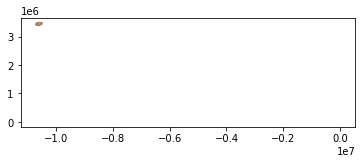

In [46]:
import itertools
import pandas as pd
all_intersections = [a.intersection(b) for a, b in list(itertools.combinations(df.geometry, 2))]
# all_intersections
s_all = pd.concat([s, gpd.GeoSeries(all_intersections)])
s_all.boundary.plot(cmap='Set1', alpha=.5)

<AxesSubplot:>

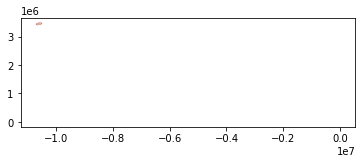

In [49]:
polys = list(shapely.ops.polygonize(s_all.boundary.unary_union))
polys = gpd.GeoSeries(polys)
polys.plot(cmap='Set1')

In [51]:
polys.plot

<bound method GeoSeries.plot of 0     POLYGON ((1.000 0.000, 0.995 -0.098, 0.981 -0....
1     POLYGON ((0.500 -0.865, 0.556 -0.831, 0.634 -0...
2     POLYGON ((0.500 -0.865, 0.471 -0.882, 0.383 -0...
3     POLYGON ((0.000 1.000, 0.098 0.995, 0.195 0.98...
4     POLYGON ((0.500 0.865, 0.471 0.882, 0.383 0.92...
5     POLYGON ((0.500 0.865, 0.556 0.831, 0.634 0.77...
6     POLYGON ((1.000 0.000, 0.995 0.098, 0.981 0.19...
7     POLYGON ((-10485873.364 3462742.899, -10486510...
8     POLYGON ((-10506357.887 3460181.639, -10506873...
9     POLYGON ((-10520338.454 3458415.609, -10520771...
10    POLYGON ((-10533041.412 3456796.470, -10533400...
11    POLYGON ((-10544858.160 3455282.010, -10545149...
12    POLYGON ((-10553444.416 3454172.401, -10553687...
13    POLYGON ((-10562160.745 3453042.382, -10562354...
14    POLYGON ((-10568629.373 3452199.389, -10568787...
15    POLYGON ((-10575428.071 3451310.830, -10575548...
16    POLYGON ((-10580792.229 3450606.873, -10580882...
17    POLYGON ((

<AxesSubplot:>

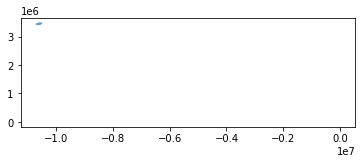

In [58]:
envgdf = gpd.GeoDataFrame(geometry=polys)
envgdf['PRECIP'] = gdf.PRECIP
envgdf.plot()